# Primer modelo de ML #

El objetivo es utilizar un Dataset para entrenar un modelo de ML supervisado que prediga el precio de las viviendas

### 1º Import libraries ###

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 2º Load Dataset ###

In [3]:
# Variables en donde se guarda el path del archivo
file_path = './kc_house_data.csv'

# Creamos el Dataframe
df = pd.read_csv(file_path)

# Revisamos que todo esté ok
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


#### Significado de las Variables ####

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent

condition - An index from 1 to 5 on the condition of the apartment,1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


### 3º Exploración básica ###

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Vemos que no hay nulos pero vamos a comprobarlo
df.isnull().sum(axis = 0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Variables Numéricas y Variables Categóricas ###

**Variables numéricas**


In [7]:
numericals = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
numericals


['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

**Variables Categóricas**

In [8]:
categoricals = ['date', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
categoricals

['date', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Se explora la variable objetivo Price ###

In [10]:
df['price'].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

C:\Users\sgome\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

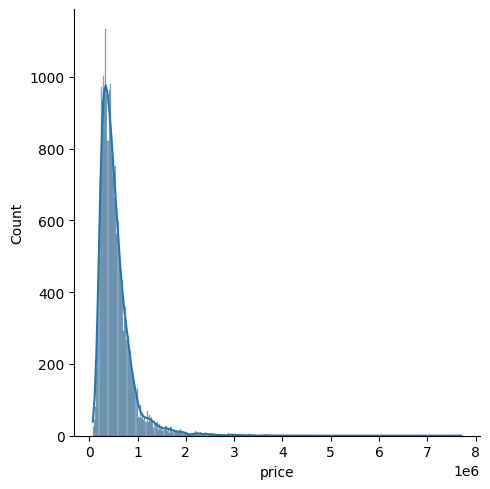

In [11]:
plt.figure(figsize =(10, 5))
sns.displot(data=df, x="price", kde=True)

Parece que hay una distribución normal aunque se extiende hacia la derecha, seguramente por outliers


### Manipulación de datos ###

In [12]:
# Se elimina la columna Id
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# Pasamos fecha a un formato que se entienda
df["date"]= pd.to_datetime(df.date)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Tenemos la fecha en que se puso en venta la casa, también tenemos la fecha en que se construyó. Con estos datso vamos a crear una nueva variable yrs_house que nos dirá cuantos años tienen la casa. Un valor importante de cara al valor de venta.

In [14]:
# Año contruida - Año puesta en venta = yrs_house
yrs_house = [df['date'][index].year - df['yr_built'][index] for index in range(df.shape[0])]

# Creamos la variable yrs_house en el dataset
df['yrs_house'] = yrs_house
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


Como esta vble es importante para predecir el valor de la casa, vamos a explorarla un poco más.

Podemos ver cuantos años tiene la casa más nueva, cuantos la casa más vieja y podemos sacar también una media

In [15]:
df['yrs_house'].describe()

count    21613.000000
mean        43.317818
std         29.375493
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: yrs_house, dtype: float64

La casa más nueva tiene -1 año. Tenemos que ver por qué es esto: un error al meter los datos?

La más vieja tiene 115 años

Y la media está en 43 años con una desviación estandar de 29 años.

In [16]:
df[df.yrs_house <0]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
1763,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,3,...,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,-1
2687,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,3,...,710,0,2015,0,98144,47.5756,-122.316,1440,4800,-1
7526,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,3,...,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,-1
8039,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,3,...,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,-1
14489,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,3,...,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,-1
17098,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,3,...,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,-1
19805,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,3,...,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,-1
20770,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,3,...,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,-1
20852,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,3,...,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,-1
20963,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,3,...,900,140,2015,0,98144,47.5951,-122.301,1350,3000,-1


Hay sólo 12 de 21613 casas con -1 año. Podemos deducir que es un error por las pocas que son. Así que procedemos a eliminarlas del dataset

In [17]:
df.drop(df[df.yrs_house < 0].index , inplace =True)
# Restaura los índices
df.reset_index(inplace = True , drop =True)

In [18]:
# Comprobamos
df[df.yrs_house <0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house


Otra variable que puede ser importante en el precio de la casa es yr_renovated que nos dice cual fue el año de la última renovación.

In [19]:
df['yr_renovated'].describe()

count    21601.000000
mean        84.449146
std        401.785874
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [20]:
df['yr_renovated'].value_counts()

yr_renovated
0       20687
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Vemos que existen 20687 registros en los que la vbla yr_renovated es 0
Es decir que sólo quedan 926 casas que han sido renovadas y el resto o no han sido renovadas desde que se construyeron
o no se ingresaron los datos de esa columna. Al ser tantos creo que es la primera opción: no han sido renovadas.
Esto puede ser importante para predecir el precio ya que aquellas que han sido renovadas deberían tener un plus en 
relación a aquellas que no lo han sido.

Vamos a ver la correlación entre el precio y el año de renovación para ver si nuestra hipótesis tiene sentido

In [21]:
df['price'].corr(df['yr_renovated'])

0.12641646161162878

Vemos que es muy pequeña, por lo tanto no influye en el precio de venta. Deberíamos eliminar esa columna, pero antes, para estar seguros, vamos a crear un nuevo Dataset llamado df_temp que contenga sólo yr_renovated, price y una nueva caracteristica renovated: True si no es 0 yr_renovated y False si es 0. 

In [22]:

df_temp = df[['yr_renovated', 'price']]
df_temp.head()

,yr_renovated,price
0,0,221900.0
1,1991,538000.0
2,0,180000.0
3,0,604000.0
4,0,510000.0


In [24]:
# Creamos la columna renovated
df_temp.loc[:,'renovated'] = df_temp['yr_renovated'].apply(lambda x: True if x > 0 else False)


In [58]:
df_temp.head()

,yr_renovated,price,renovated
0,0,221900.0,False
1,1991,538000.0,True
2,0,180000.0,False
3,0,604000.0,False
4,0,510000.0,False


C:\Users\sgome\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


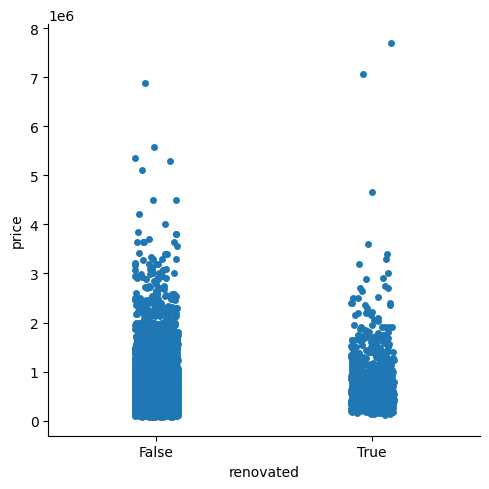

In [25]:
# Graficamos para verlo visualmente
sns.catplot(x ="renovated",  y ="price", data = df_temp)

Eliminamos la columna porque corroboramos que no influye.



In [26]:
# Se elimina la columna yr_renovated
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,28


<Axes: >

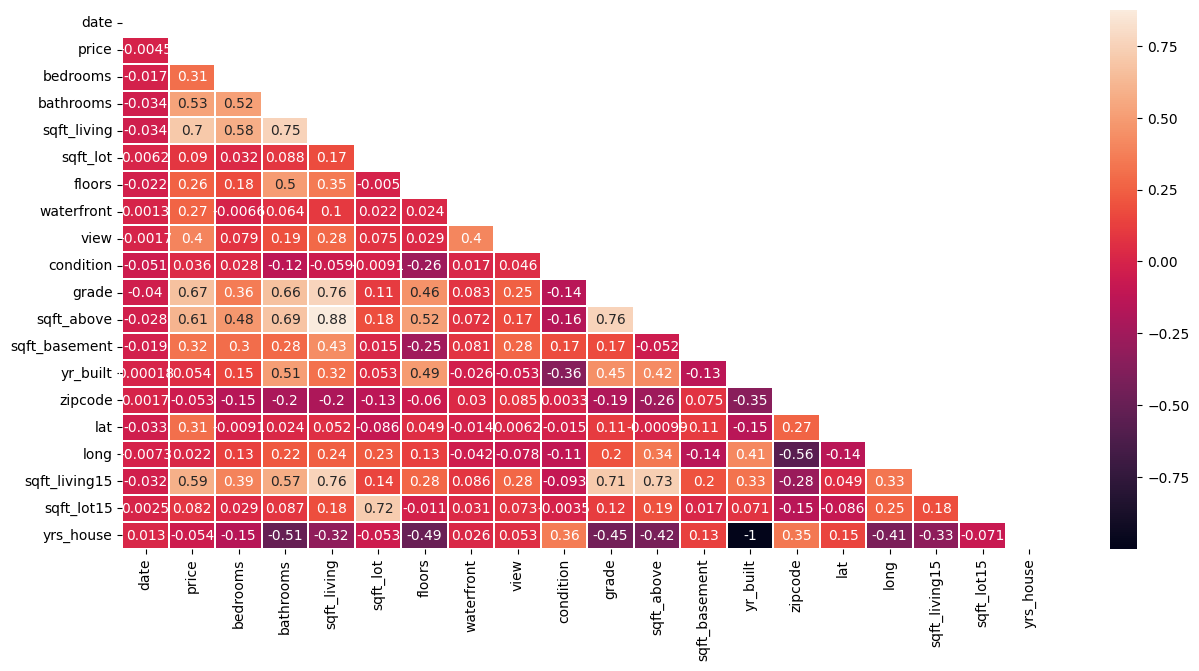

In [36]:
### corrolation plot
plt.figure(figsize =(15,7))
# Generamos una máscara para no duplicar los valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr() , mask = mask, annot =True , linewidth =0.2)

Correlaciones importantes:
con price:
- bathrooms
- **sqft_living**
- grade
- sqft_living15
- Bathrooms
- 

In [49]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702287
grade            0.667739
sqft_above       0.605715
sqft_living15    0.585383
bathrooms        0.525276
view             0.397349
sqft_basement    0.323835
bedrooms         0.308456
lat              0.307100
waterfront       0.266370
floors           0.257184
sqft_lot         0.089634
sqft_lot15       0.082423
yr_built         0.054216
condition        0.036296
long             0.021533
date            -0.004453
zipcode         -0.053066
yrs_house       -0.054157
Name: price, dtype: float64

<Axes: xlabel='sqft_living', ylabel='price'>

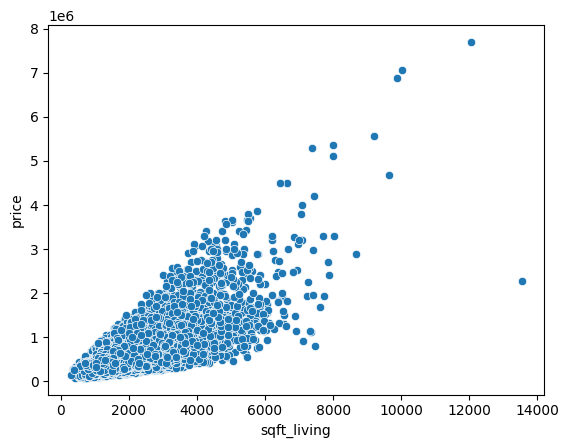

In [38]:
sns.scatterplot(y='price',x='sqft_living',data=df)

Se ve una correlación entre los metros cuadrados y el precio.



<Axes: xlabel='grade', ylabel='price'>

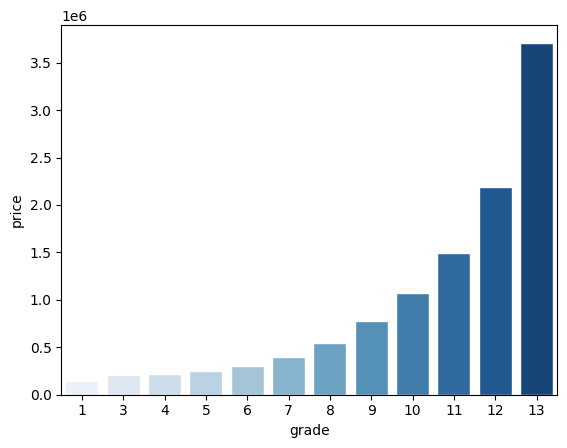

In [62]:
sns.barplot(x = 'grade', y = 'price',  data = df,
            palette = 'Blues', edgecolor = 'w', errorbar=None )

Como era de esperar a mayor calidad de construcción mayor el precio de venta. grade sería una variable importante para la predicción

In [66]:
# Eliminamos las columnas date porque es categórica y ya sacamos el dato que queríamos de ella
df.drop('date', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,28


Preparo el set de datos para el modelo. 

In [75]:
y = df["price"]  # y Variable a predecir
X = df.drop(columns="price")  # X datos para entrenar y testear. Creamos un nuevo Dataset sin la categoría price
print(f"y tiene {y.shape[0]} filas")
print(f"X tiene {X.shape[0]} filas y {X.shape[1]} columnas")
df.shape
     

y tiene 21601 filas
X tiene 21601 filas y 18 columnas


(21601, 19)

### Preparación de datos ###
Vamos a probar los modelos con los datos que tenemos